# ЛР2 - Корнеева Анна ИУ5-23М
## Задание
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
* устранение пропусков в данных;
* кодирование категориальных признаков;
* нормализацию числовых признаков.

## Описание набора данных

Датасет "Water quality" (https://www.kaggle.com/adityakadiwal/water-potability) содержит признаки, описывающие качество воды по нескольким параметрам. Целевой признак - пригодность источника к употреблению воды.  
  
##### Описание признаков
- pH: уровень кислотности.
- Hardness: жесткость воды.
- Solids: концентрация твердых частиц.
- Chloramines: уровень хлорирования воды.
- Sulfate: содержание сульфатов.
- Conductivity: электропроводность воды.
- Organic_carbon: содержание органического углерода.
- Trihalomethanes: содержание тригалометана.
- Turbidity: мутность воды.
- Potability: пригодность для питья (целевой признак).

In [89]:
import numpy as np
import pandas as pd

In [90]:
df = pd.read_csv('water_potability.csv')

In [92]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [93]:
print(df.shape)

(3276, 10)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   object 
dtypes: float64(9), object(1)
memory usage: 256.1+ KB


Проверим данные на наличие пропусков.

In [95]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# 1. Устранение пропусков в данных
В данных присутствуют пропуски

Узнаем процентное соотношение пропусков по всем полям.

In [96]:
null_perc = {
    col_name : df[col_name].isnull().sum() / df.shape[0] * 100.
    for col_name in df.columns
}
print(*null_perc.items(), sep='\n')

('ph', 14.987789987789988)
('Hardness', 0.0)
('Solids', 0.0)
('Chloramines', 0.0)
('Sulfate', 23.84004884004884)
('Conductivity', 0.0)
('Organic_carbon', 0.0)
('Trihalomethanes', 4.945054945054945)
('Turbidity', 0.0)
('Potability', 0.0)


Наблюдаются пропуски данных в 4 колонках, причем поле Sulfate имеет практически четверть пропусков - удаление строк с пропусками в таком случае приведет к существенной потере данных. Таким образом, предпочтем удалению заполнение пропусков средними значениями по соответствующим колонкам (важно, что почти все признаки описываются вещественными числами - это позволяет воспользоваться средним значением. Для категориальных признаков воспользуемся модой).

In [97]:
for col_name in df.columns:
    if col_name != 'Potability':
        df[col_name] = df[col_name].fillna(df[col_name].mean())
    else:
        df[col_name] = df[col_name].fillna(df[col_name].mode())

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [98]:
df.shape

(3276, 10)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [100]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Размерность матрицы не изменилась, никакие данные не были потеряны.

# 2. Кодирование категориальных признаков
Кодирование категориальных признаков буду производить с помощью энкодера category_encoders.CountEncoder с нормализацией

In [102]:
from category_encoders.count import CountEncoder

ce = CountEncoder(normalize=True)

for col_name in df.columns:
    if df[col_name].dtype == 'object':
        df[col_name] = ce.fit_transform(df[col_name])

In [103]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


В датасете не осталось признаков с типом object.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# 3. Нормализация числовых признаков
Для нормальзации числовых признаков буду использовать преобразование Бокса-Кокса.

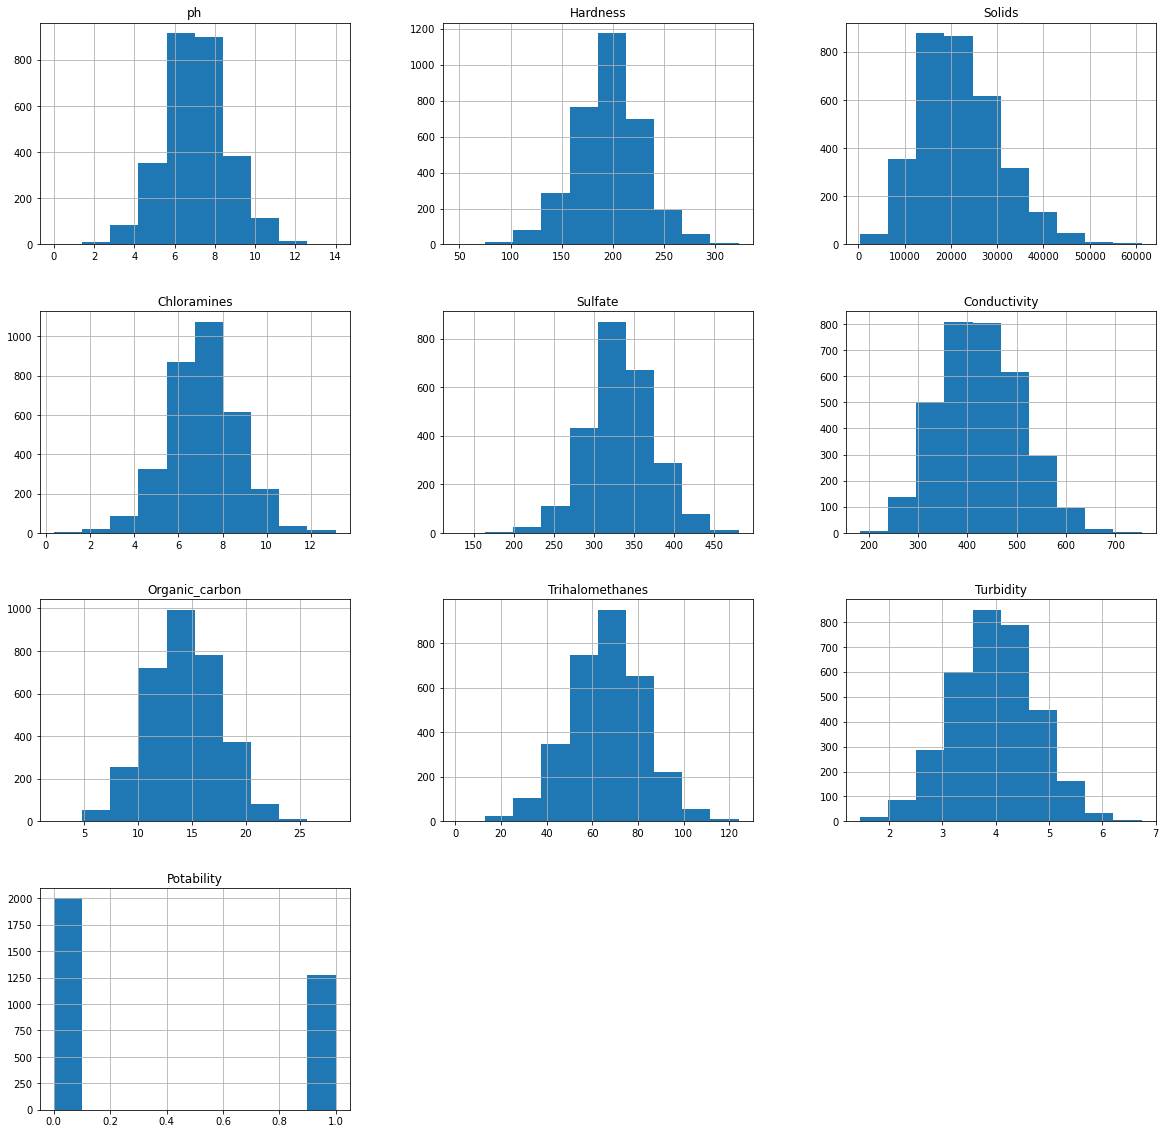

In [105]:
import matplotlib.pyplot as plt
data.hist(figsize=(20,20))
plt.show()

In [106]:
import scipy.stats as stats
import seaborn as sns
# boxcox
for col_name in data.columns:
    if len(data[data[col_name] <= 0]) > 0:
        data[col_name] = data[col_name].sub(data[col_name].min() - 0.0000001)
    data[col_name], param = stats.boxcox(data[col_name]) 

Получили нормализованные данные.

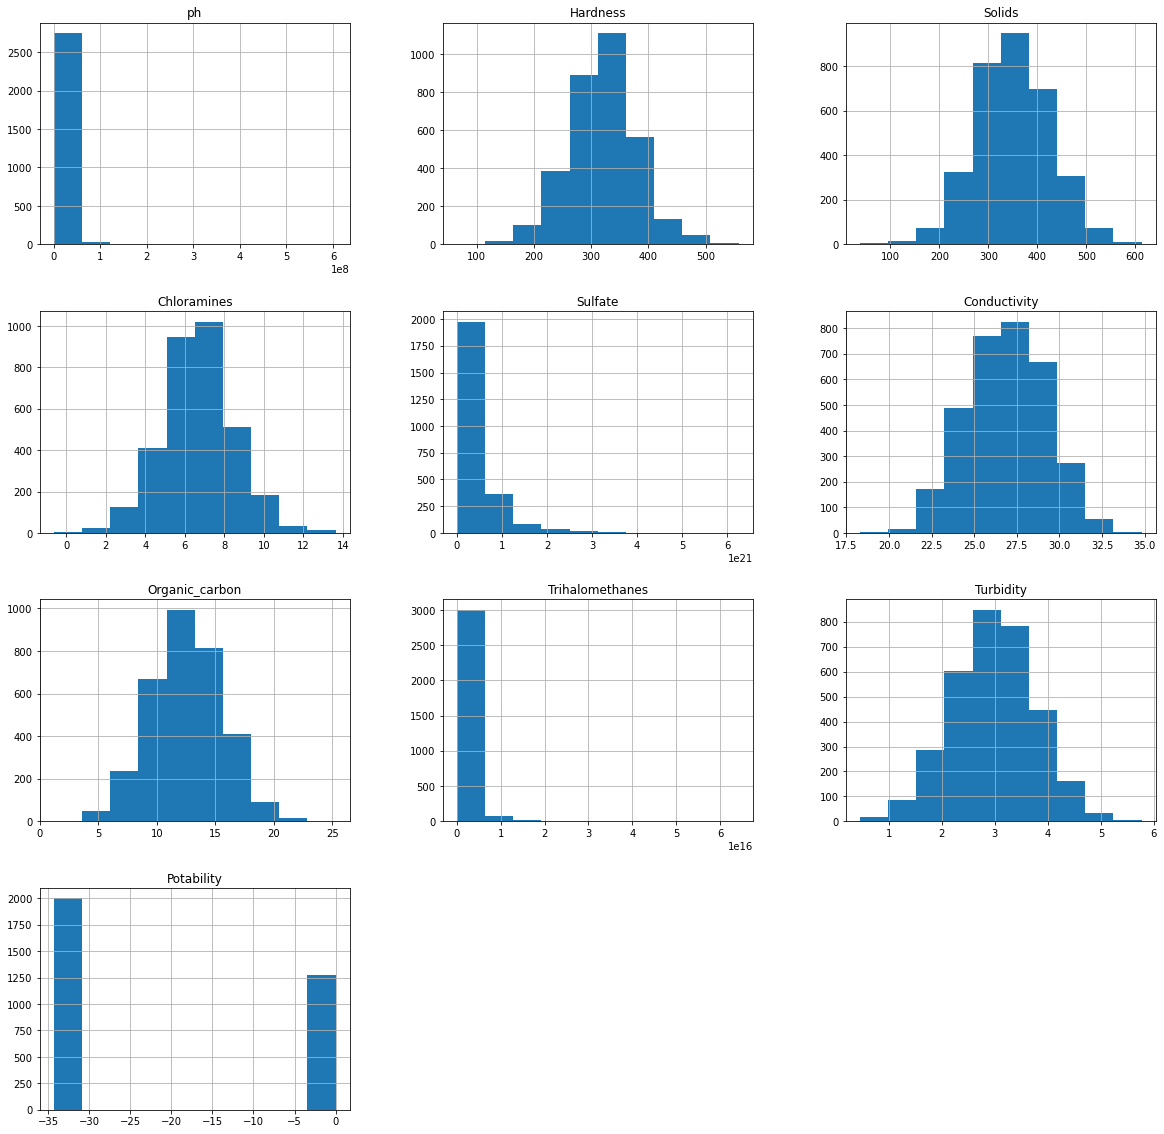

In [107]:
data.hist(figsize=(20,20))
plt.show()

В результате получили датасет без пропусков с нормализванными значениями